In [3]:
#Some important modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
import datetime as dt
import numpy as np
from sklearn.metrics import mean_squared_error


In [ ]:
covid = pd.read_csv('/content/covid_19_india.csv')

In [ ]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
covid.shape

(14150, 9)

In [ ]:
covid.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [ ]:
#looking at the different location
covid["State/UnionTerritory"].value_counts()

Kerala                                      450
Telengana                                   418
Delhi                                       418
Rajasthan                                   417
Haryana                                     416
Uttar Pradesh                               416
Ladakh                                      413
Tamil Nadu                                  413
Maharashtra                                 411
Karnataka                                   411
Jammu and Kashmir                           411
Punjab                                      411
Andhra Pradesh                              408
Uttarakhand                                 405
Odisha                                      404
West Bengal                                 402
Puducherry                                  402
Chandigarh                                  401
Chhattisgarh                                401
Gujarat                                     400
Madhya Pradesh                          

In [ ]:
#checking if columns haveing null values
covid.isna().any()

Sno                         False
Date                        False
Time                        False
State/UnionTerritory        False
ConfirmedIndianNational     False
ConfirmedForeignNational    False
Cured                       False
Deaths                      False
Confirmed                   False
dtype: bool

In [ ]:
#preprocessing data of maharastra state
data_maharastra=covid.loc[(covid['State/UnionTerritory']=='Maharashtra')]
data_maharastra  # data for west bengal

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,77,2020-03-09,6:00 PM,Maharashtra,2,0,0,0,2
91,92,2020-03-10,6:00 PM,Maharashtra,5,0,0,0,5
97,98,2020-03-11,6:00 PM,Maharashtra,2,0,0,0,2
120,121,2020-03-12,6:00 PM,Maharashtra,11,0,0,0,11
133,134,2020-03-13,6:00 PM,Maharashtra,14,0,0,0,14
...,...,...,...,...,...,...,...,...,...
13990,13991,2021-04-19,8:00 AM,Maharashtra,-,-,3106828,60473,3839338
14026,14027,2021-04-20,8:00 AM,Maharashtra,-,-,3159240,60824,3898262
14062,14063,2021-04-21,8:00 AM,Maharashtra,-,-,3213464,61343,3960359
14098,14099,2021-04-22,8:00 AM,Maharashtra,-,-,3268449,61911,4027827


In [ ]:
cured_chart = go.Scatter(x=covid['Date'],y=covid['Cured'],name="Cured Rate")
death_chart = go.Scatter(x=covid['Date'],y=covid['Deaths'],name="Deaths Rate")
py.iplot([cured_chart,death_chart])

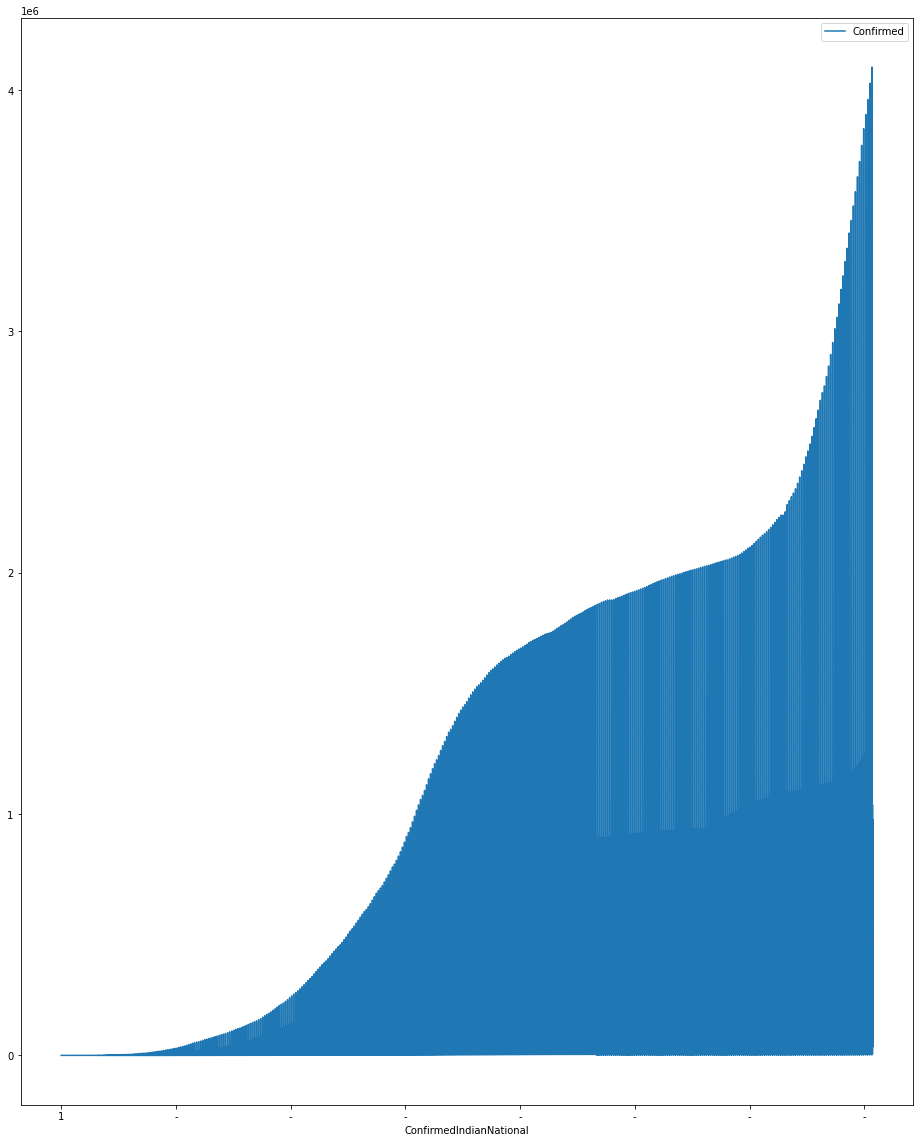

In [ ]:
covid.plot(x ="ConfirmedIndianNational",y="Confirmed",kind="line",figsize=(16,20))

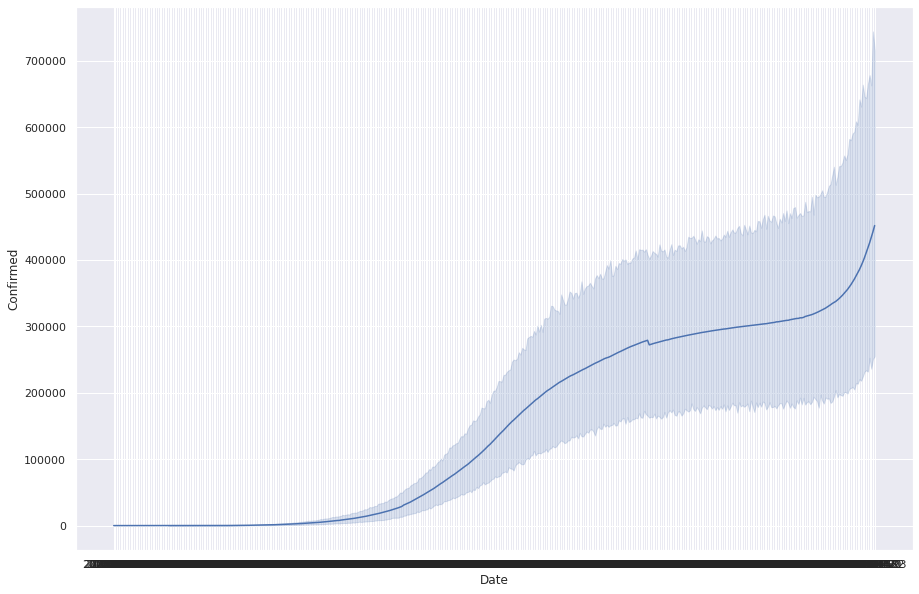

In [ ]:
#total cases per day
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Date",y="Confirmed",data=covid)
plt.show()

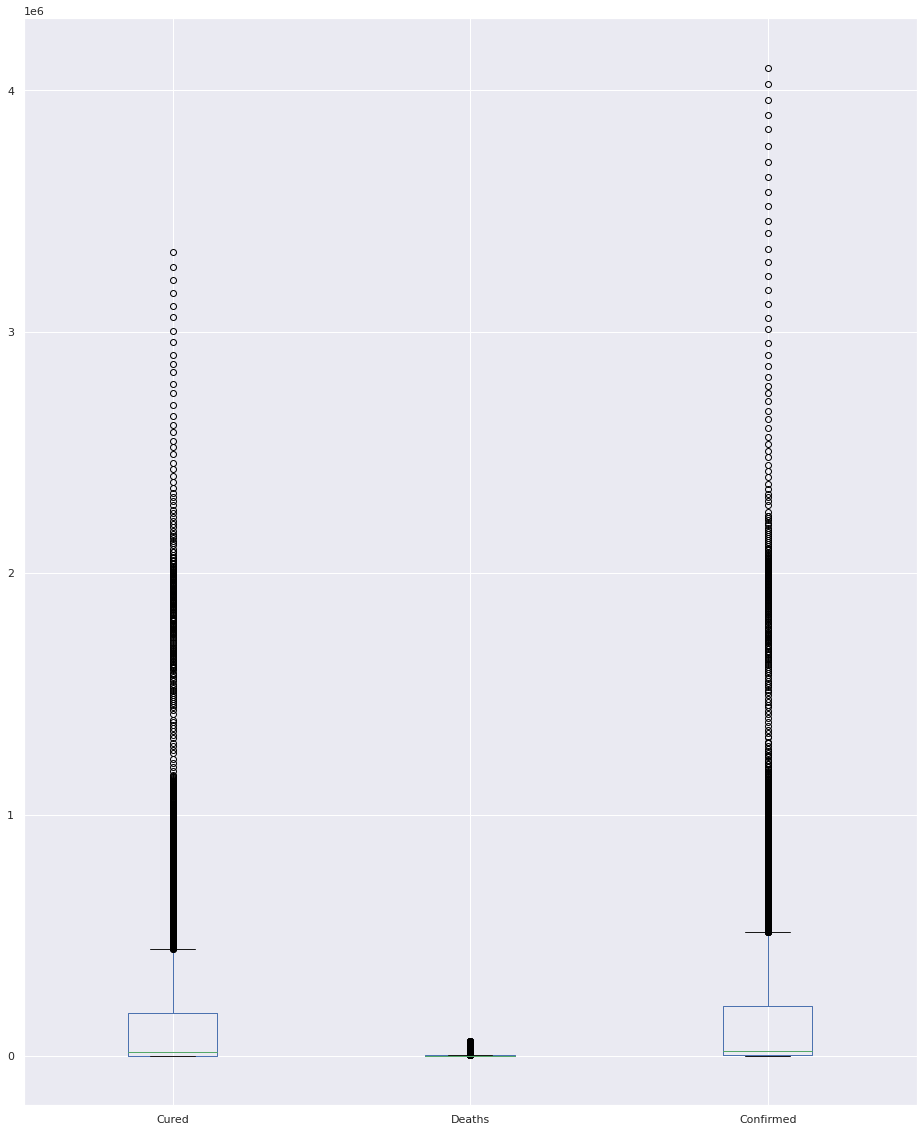

In [ ]:
covid.drop(['Sno'],axis='columns',inplace=True)
covid.plot(kind="box",figsize=(16,20))

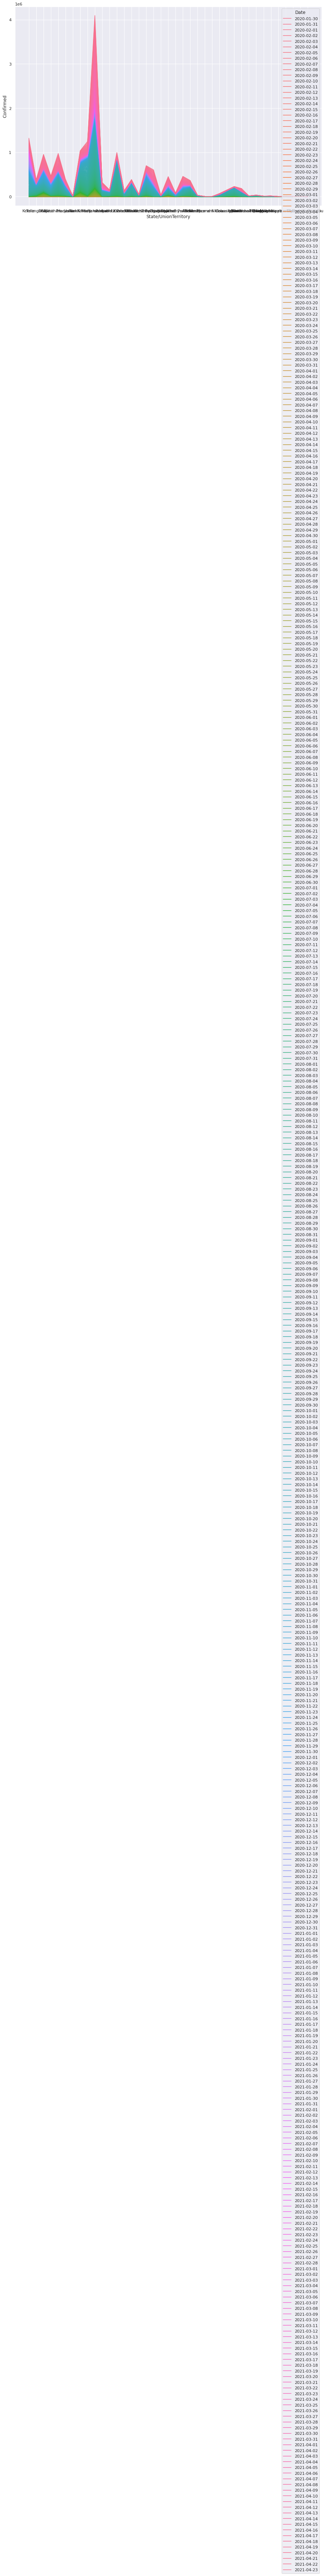

In [ ]:
#plotting growth of cases accross india
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="State/UnionTerritory",y="Confirmed",data=covid,hue="Date")
plt.show()

In [ ]:
#sorting data w.r.t total active cases
covid['Total_Active'] = covid['Confirmed'] - (covid['Deaths'] +covid['Cured'])    # total active cases
total_cases = covid.groupby('State/UnionTerritory')['Total_Active'].sum().sort_values(ascending=False).to_frame()
total_cases.style.background_gradient(cmap='Reds')

,Total_Active
State/UnionTerritory,
Maharashtra,50327473
Kerala,14930926
Karnataka,13925533
Uttar Pradesh,9199858
Tamil Nadu,9041082
Andhra Pradesh,8933885
Delhi,6185368
West Bengal,5773678
Chhattisgarh,5656964


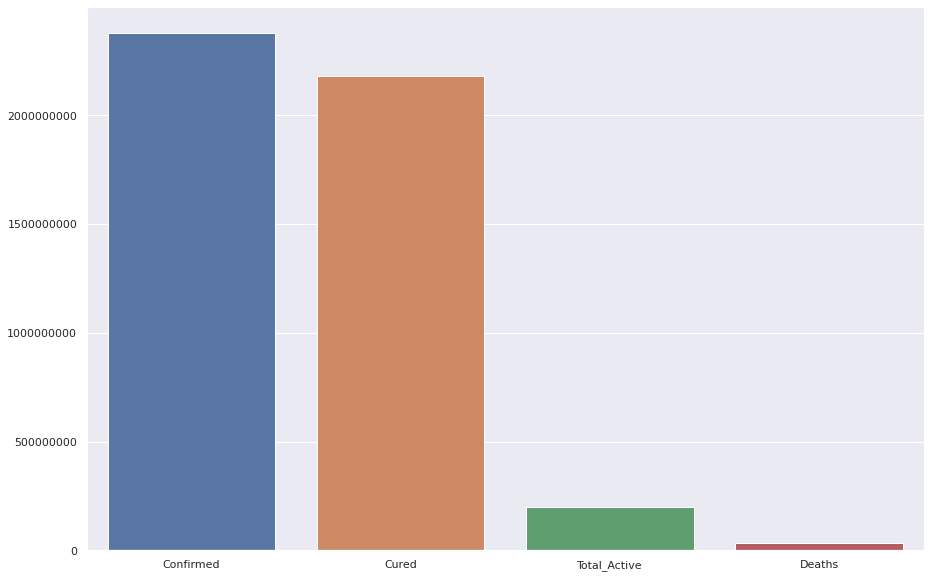

In [ ]:
x = covid['Confirmed'].sum()
y = covid['Cured'].sum()
z= covid['Deaths'].sum()
active_cases= x-y

barp = sns.barplot(x=['Confirmed','Cured','Total_Active','Deaths'],y=[x,y,active_cases,z])
barp.set_yticklabels(labels=(barp.get_yticks()*1).astype(int))
plt.show()

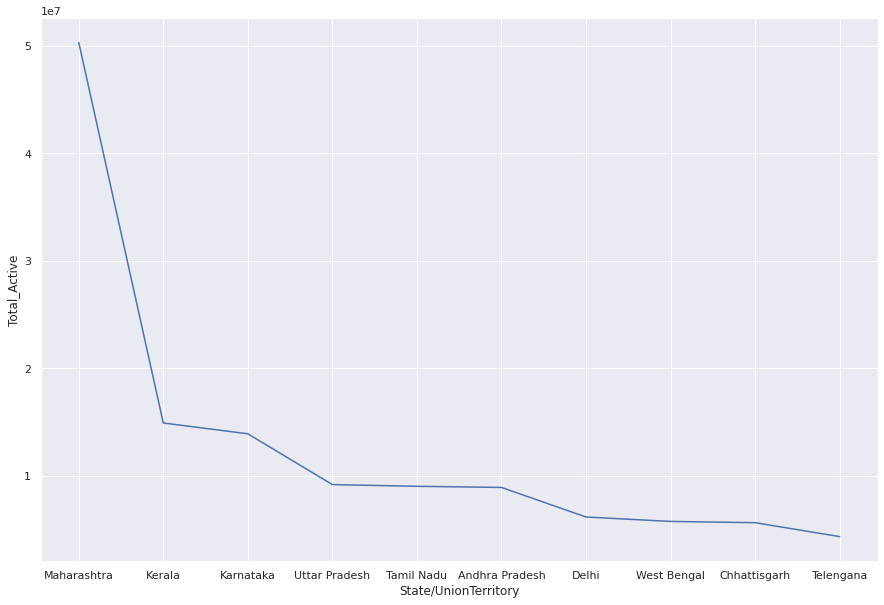

In [ ]:
covid['Total_Active'] = covid['Confirmed'] - (covid['Deaths'] +covid['Cured'])
total_cases = covid.groupby('State/UnionTerritory')['Total_Active'].sum().sort_values(ascending=False).to_frame()
#print(total_cases)
sns.lineplot(x="State/UnionTerritory",y="Total_Active",data=total_cases[0:10])
plt.show()

In [ ]:
covid.describe()

,Cured,Deaths,Confirmed,Total_Active
count,1.415000e+04,14150.000000,1.415000e+04,14150.000000
mean,1.540126e+05,2471.903816,1.681579e+05,11673.360495
std,3.105335e+05,6607.935316,3.384063e+05,34338.528954
min,0.000000e+00,0.000000,0.000000e+00,-9368.000000
25%,1.225250e+03,10.000000,2.355250e+03,192.000000
50%,1.677250e+04,318.000000,2.102550e+04,1707.500000
75%,1.782590e+05,1915.000000,2.059975e+05,9107.500000
max,3.330747e+06,62479.000000,4.094840e+06,701614.000000


In [ ]:
#Model Building
covid.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total_Active
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3


In [ ]:
#converting  string date to date-time
covid['Date'] = pd.to_datetime(covid['Date'])
covid.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total_Active
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df1 = data_maharastra['Confirmed']    # confirmed data for maharastra


In [ ]:
df1 = df1.values

In [ ]:
train_size=int(len(df1)*0.80)
test_size = len(df1)-train_size
train,test=df1[0:train_size:],df1[train_size:len(df1):]
print(len(train),len(test))

328 83


In [ ]:
def create_dataset(dataset,look_back=1):
  datax,datay=[],[]
  for i in range(len(dataset)-look_back-1):
    a=dataset[i:(i+look_back)]
    datax.append(a)
    datay.append(dataset[i+look_back])
  return np.array(datax),np.array(datay)

In [ ]:
look_back=2
trainx,trainy=create_dataset(train,look_back=look_back)
testx,testy=create_dataset(test,look_back=look_back)


In [ ]:
model=LinearRegression()

In [ ]:
model.fit(trainx,trainy)  # its means the data trained successfully

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(testx,testy)  # score for only maharastra state

0.9999222736740071

In [ ]:
predict1=model.predict(testx)

In [ ]:
df2=pd.DataFrame({'Actual':testy.flatten(), 'Predicted': predict1.flatten()})
df2

,Actual,Predicted
0,2028347,2.029022e+06
1,2030274,2.030350e+06
2,2033266,2.032257e+06
3,2036002,2.036284e+06
4,2038630,2.038771e+06
...,...,...
75,3770707,3.765591e+06
76,3839338,3.836011e+06
77,3898262,3.906105e+06
78,3960359,3.955583e+06


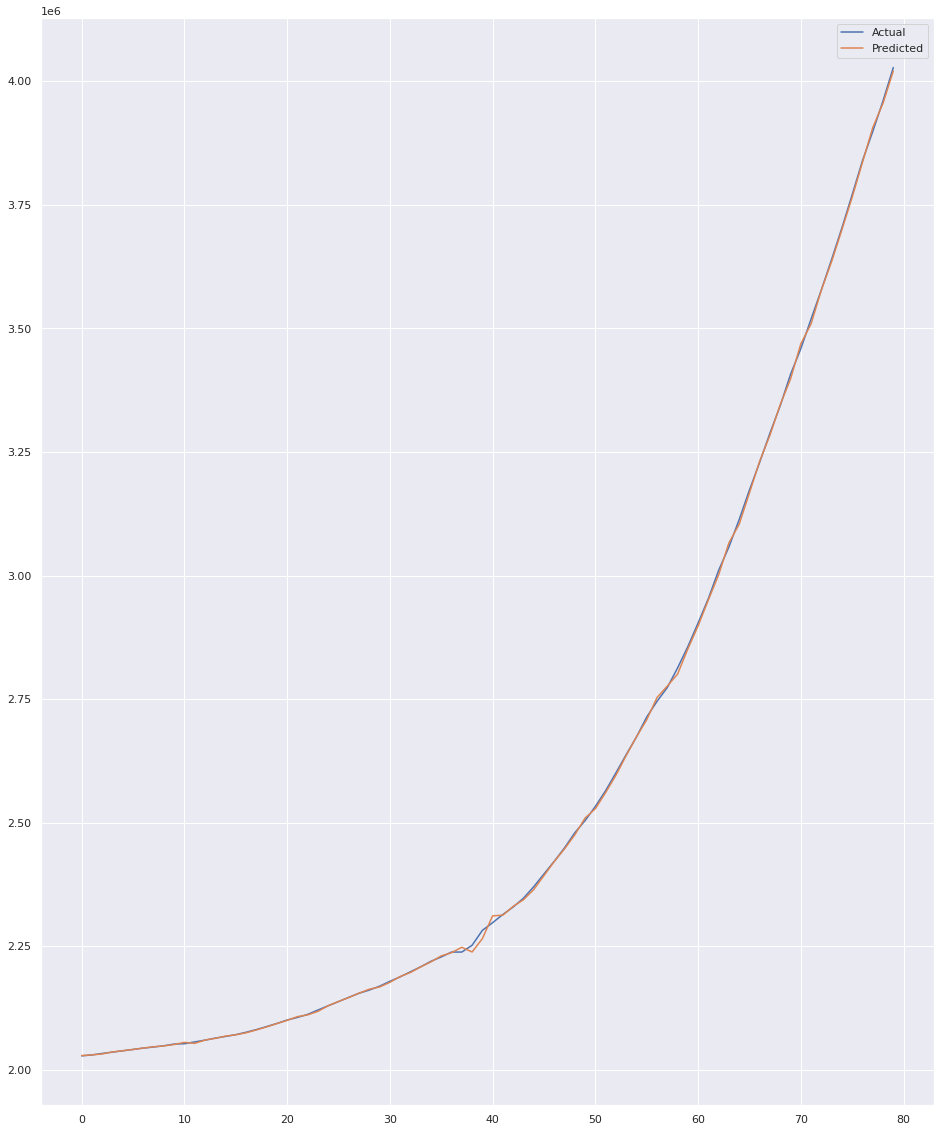

In [ ]:
df2.plot(kind="line",figsize=(16,20))

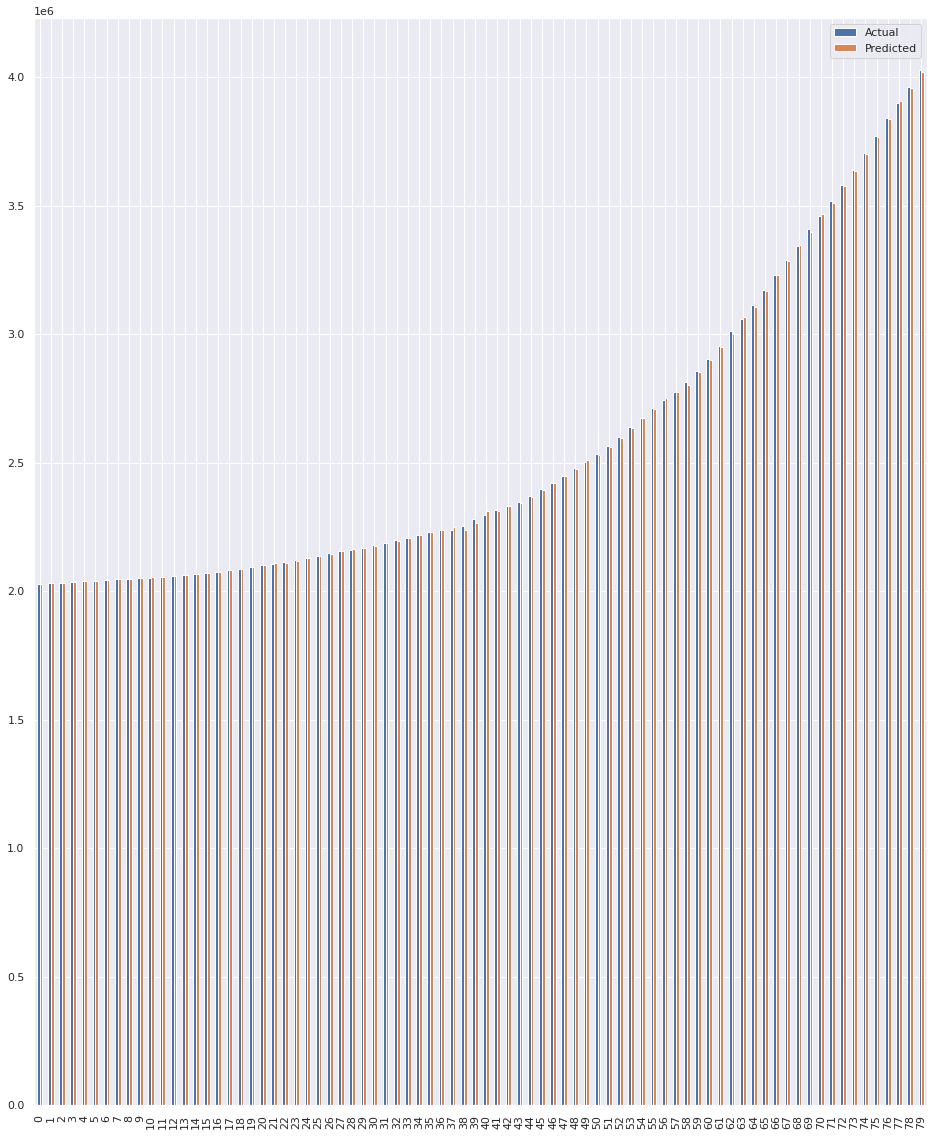

In [ ]:
df2.plot(kind="bar",figsize=(16,20))


# Decision Tree


In [ ]:
from sklearn import tree

In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(covid['Confirmed'].values.reshape(-1,1),covid['Deaths'])    # trained

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.score(covid['Confirmed'].values.reshape(-1,1),covid['Deaths'])

0.913286219081272

# LASSO L1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import linear_model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(covid['Confirmed'].values.reshape(-1,1), covid['Deaths'],test_size=0.2)

In [ ]:
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

In [ ]:
lasso_reg.score(x_test,y_test)